# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago Andrés Angulo Toro - 1001154362
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
from scipy.linalg import eig, eigh
import matplotlib.pyplot as plt
import sympy as sp

# 1.

<center>

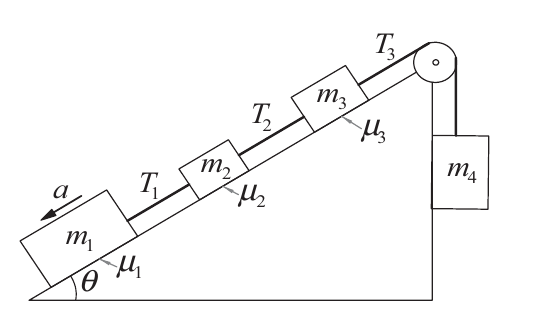

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [6]:
# Datos
m = np.array([10, 4, 5, 6], dtype=float)
mu = np.array([0.25, 0.3, 0.2], dtype=float)
g = 9.81
theta = np.deg2rad(45)

A = np.array([
    [1, 0, 0, m[0]],
    [-1, 1, 0, m[1]],
    [0, -1, 1, m[2]],
    [0, 0, -1, m[3]]
], dtype=float)

b = np.array([
    m[0]*g*(np.sin(theta) - mu[0]*np.cos(theta)),
    m[1]*g*(np.sin(theta) - mu[1]*np.cos(theta)),
    m[2]*g*(np.sin(theta) - mu[2]*np.cos(theta)),
    -m[3]*g
], dtype=float)

T1, T2, T3, a = np.linalg.solve(A, b)

print(f"T1 = {T1:.4f} N")
print(f"T2 = {T2:.4f} N")
print(f"T3 = {T3:.4f} N")
print(f"a  = {a:.4f} m/s²")


T1 = 35.8914 N
T2 = 48.8606 N
T3 = 68.5404 N
a  = 1.6134 m/s²


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

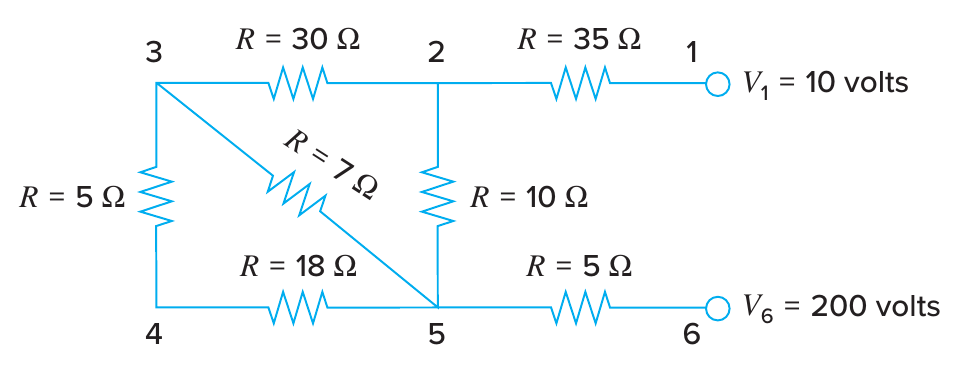


In [8]:
#Datos
V1 = 10.0
V6 = 200.0

R12 = 35.0
R23 = 30.0
R34 = 5.0
R45 = 18.0
R35 = 7.0
R25 = 10.0
R56 = 5.0

# Conductancias
G12 = 1.0 / R12
G23 = 1.0 / R23
G34 = 1.0 / R34
G45 = 1.0 / R45
G35 = 1.0 / R35
G25 = 1.0 / R25
G56 = 1.0 / R56

A = np.array([
    [G12 + G23 + G25,   -G23,            0.0,       -G25],
    [-G23,              G23 + G34 + G35, -G34,      -G35],
    [0.0,               -G34,            G34 + G45, -G45],
    [-G25,              -G35,            -G45,      G25 + G35 + G45 + G56]
], dtype=float)

b = np.array([
    G12 * V1,
    0.0,
    0.0,
    G56 * V6
], dtype=float)


V2, V3, V4, V5 = np.linalg.solve(A, b)

# Corrientes por ramas (convención: i_ij = (Vi - Vj)/Rij, de i hacia j)
def i(Vi, Vj, R):
    return (Vi - Vj) / R

i12 = i(V1, V2, R12)
i23 = i(V2, V3, R23)
i34 = i(V3, V4, R34)
i45 = i(V4, V5, R45)
i35 = i(V3, V5, R35)
i25 = i(V2, V5, R25)
i56 = i(V5, V6, R56)

print(f"Voltajes por nodos:")
print(f"V2 = {V2:.6f} V,  V3 = {V3:.6f} V,  V4 = {V4:.6f} V,  V5 = {V5:.6f} V\n")

print("Corrientes por ramas (sentido i_ij: de i hacia j):")
print(f"i12 = {i12:.6f} A")
print(f"i23 = {i23:.6f} A")
print(f"i34 = {i34:.6f} A")
print(f"i45 = {i45:.6f} A")
print(f"i35 = {i35:.6f} A")
print(f"i25 = {i25:.6f} A")
print(f"i56 = {i56:.6f} A")
 #el signo negativo indica que la corriente real va en el sentido opuesto al definido

Voltajes por nodos:
V2 = 149.133743 V,  V3 = 175.421214 V,  V4 = 176.443505 V,  V5 = 180.123751 V

Corrientes por ramas (sentido i_ij: de i hacia j):
i12 = -3.975250 A
i23 = -0.876249 A
i34 = -0.204458 A
i45 = -0.204458 A
i35 = -0.671791 A
i25 = -3.099001 A
i56 = -3.975250 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

Matriz A:
 [[ 2. -1.  1.]
 [ 0.  3. -1.]
 [ 2.  1.  3.]]

Autovalores:
 [4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]

Matriz de autovectores U:
 [[-0.57735027+0.00000000e+00j -0.57735027+9.73718355e-09j
  -0.57735027-9.73718355e-09j]
 [ 0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
   0.57735027-0.00000000e+00j]
 [-0.57735027+0.00000000e+00j  0.57735027-9.73718355e-09j
   0.57735027+9.73718355e-09j]]

Verificación A ≈ U D U^{-1}:
 [[ 2.00000000e+00+4.22907063e-10j -1.00000000e+00+4.22907063e-10j
   1.00000000e+00-2.16182500e-24j]
 [ 1.88737914e-15-4.45946263e-10j  3.00000000e+00-4.45946263e-10j
  -1.00000000e+00-1.79300708e-24j]
 [ 2.00000000e+00+2.91325159e-11j  1.00000000e+00+2.91325159e-11j
   3.00000000e+00+1.30125162e-24j]]
Error máximo en x(t): 3459.633181299292
Error máximo en y(t): 2801.5806235609302
Error máximo en z(t): 3062.6680188694145


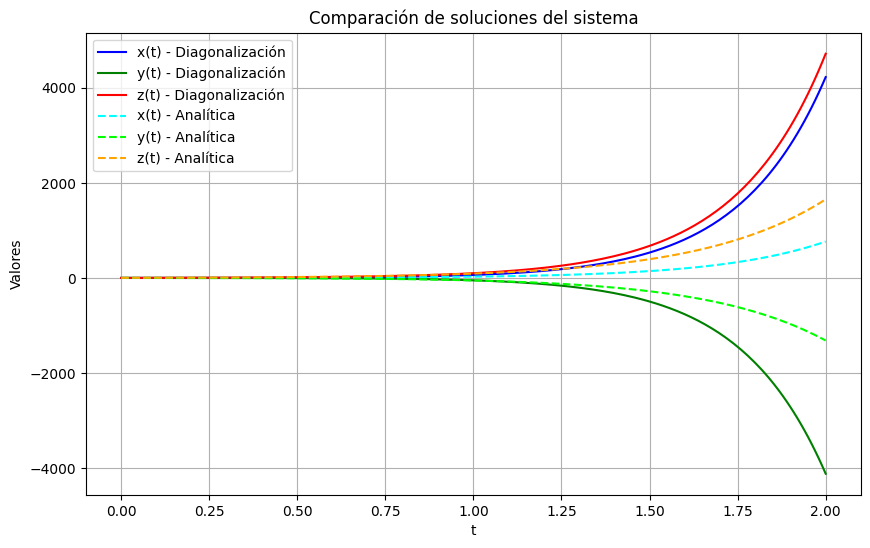

In [10]:
A = np.array([[2, -1,  1],
              [0,  3, -1],
              [2,  1,  3]], dtype=float)

# Condición inicial
r0 = np.array([1, 1, 2], dtype=float)

# Intervalo de tiempo
t_vals = np.linspace(0, 2, 200)

eigvals, eigvecs = np.linalg.eig(A)
U = eigvecs
D = np.diag(eigvals)
U_inv = np.linalg.inv(U)

print("Matriz A:\n", A)
print("\nAutovalores:\n", eigvals)
print("\nMatriz de autovectores U:\n", U)
print("\nVerificación A ≈ U D U^{-1}:\n", U @ D @ U_inv)


def solucion_diagonalizacion(t):
    exp_Dt = np.diag(np.exp(eigvals * t))
    return U @ exp_Dt @ U_inv @ r0

sol_diag = np.array([solucion_diagonalizacion(t) for t in t_vals])
x_num, y_num, z_num = sol_diag[:,0], sol_diag[:,1], sol_diag[:,2]


def solucion_analitica(t):
    e2t = np.exp(2*t)

    x = r0[0]*(np.exp(t)*(1 + e2t) - 2*t*e2t) + \
        r0[1]*(-2*t*e2t) + \
        r0[2]*(np.exp(t)*(-1 + e2t))

    y = r0[0]*(-np.exp(t)*(-1 + e2t) - 2*t*e2t) + \
        r0[1]*(np.exp(t)*(2*t + 1) + e2t) + \
        r0[2]*(-np.exp(t)*(-1 + e2t))

    z = r0[0]*(np.exp(t)*(-1 + e2t) + 2*t*e2t) + \
        r0[1]*(2*t*e2t) + \
        r0[2]*(np.exp(t)*(1 + e2t))

    return np.array([x, y, z])

solucionanalitica = np.array([solucion_analitica(t) for t in t_vals])
x_ana, y_ana, z_ana = solucionanalitica [:,0], solucionanalitica [:,1], solucionanalitica [:,2]


error_x = np.max(np.abs(x_num - x_ana))
error_y = np.max(np.abs(y_num - y_ana))
error_z = np.max(np.abs(z_num - z_ana))

print("Error máximo en x(t):", error_x)
print("Error máximo en y(t):", error_y)
print("Error máximo en z(t):", error_z)

plt.figure(figsize=(10,6))
plt.plot(t_vals, x_num, label='x(t) - Diagonalización', color='blue')
plt.plot(t_vals, y_num, label='y(t) - Diagonalización', color='green')
plt.plot(t_vals, z_num, label='z(t) - Diagonalización', color='red')

plt.plot(t_vals, x_ana, '--', color='cyan', label='x(t) - Analítica')
plt.plot(t_vals, y_ana, '--', color='lime', label='y(t) - Analítica')
plt.plot(t_vals, z_ana, '--', color='orange', label='z(t) - Analítica')

plt.xlabel('t')
plt.ylabel('Valores')
plt.title('Comparación de soluciones del sistema')
plt.legend()
plt.grid(True)
plt.show()


# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [13]:
hbar = 1.054_571_817e-34  # J·s

def H_matriz(Bx, By, Bz, gamma=2.0, use_SI=False):

    pref = -gamma*hbar/2 if use_SI else -gamma/2  # factor delante de la matriz de B
    # Matriz que multiplica al prefactor
    M = np.array([[Bz, Bx - 1j*By],
                  [Bx + 1j*By, -Bz]], dtype=complex)
    return pref * M

def eshermitica(M, tol=1e-12):
    return np.allclose(M, M.conj().T, atol=tol)

def eig_sorted(H):

    vals, vecs = np.linalg.eig(H)
    idx = np.argsort(np.real(vals))
    vals = vals[idx]
    vecs = vecs[:, idx]
    # Normalización explícita
    for k in range(vecs.shape[1]):
        vecs[:, k] /= np.linalg.norm(vecs[:, k])
    return vals, vecs


# 1) Verificación Hermiticidad (B general)

Bx, By, Bz = 0.3, -0.1, 0.5   # ejemplo cualquiera
H_gen = H_matriz(Bx, By, Bz, gamma=2.0, use_SI=False)
print("¿H es Hermítico?:", eshermitica(H_gen))

E_gen, V_gen = eig_sorted(H_gen)
print("\nAutovalores (generales) en unidades de hbar·B:", E_gen)
print("Autovectores (columnas, normalizados):\n", V_gen)

# 2) Caso del enunciado: B = 1 gauss en z

B_gauss = 1.0
H_enun = H_matriz(0.0, 0.0, B_gauss, gamma=2.0, use_SI=False)
E, V = eig_sorted(H_enun)

print("\n== Caso pedido: γ=2 y B=1 gauss en z ==")
print("Hamiltoniano (unidades de hbar·gauss):\n", H_enun)
print("Niveles de energía (unidades de hbar·gauss):", E)
print("Autovectores normalizados (columnas):\n", V)

# 3) Valores físicos en SI

gamma_e_rad_s_T = 1.760_859_630e11      # rad/(s·T)
B_T = 1e-4                              # 1 gauss = 1e-4 T

H_SI = H_matriz(0.0, 0.0, B_T, gamma=gamma_e_rad_s_T, use_SI=True)
E_SI, V_SI = eig_sorted(H_SI)

print("Valores físicos en SI ")
print("Hamiltoniano en Joule:\n", H_SI)
print("Niveles de energía en Joule:", E_SI)
print("Separación ΔE (J):", np.real(E_SI[1] - E_SI[0]))
print("Autovectores normalizados (columnas):\n", V_SI)


¿H es Hermítico?: True

Autovalores (generales) en unidades de hbar·B: [-0.59160798-3.7089948e-18j  0.59160798+3.7089948e-18j]
Autovectores (columnas, normalizados):
 [[ 0.96050879+0.j         -0.2639708 -0.08799027j]
 [ 0.2639708 -0.08799027j  0.96050879+0.j        ]]

== Caso pedido: γ=2 y B=1 gauss en z ==
Hamiltoniano (unidades de hbar·gauss):
 [[-1.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j]]
Niveles de energía (unidades de hbar·gauss): [-1.+0.j  1.-0.j]
Autovectores normalizados (columnas):
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

== (Opcional) Valores físicos en SI ==
Hamiltoniano en Joule:
 [[-9.2847647e-28+0.j -0.0000000e+00+0.j]
 [-0.0000000e+00+0.j  9.2847647e-28-0.j]]
Niveles de energía en Joule: [-9.2847647e-28+0.j  9.2847647e-28-0.j]
Separación ΔE (J): 1.856952939491048e-27
Autovectores normalizados (columnas):
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

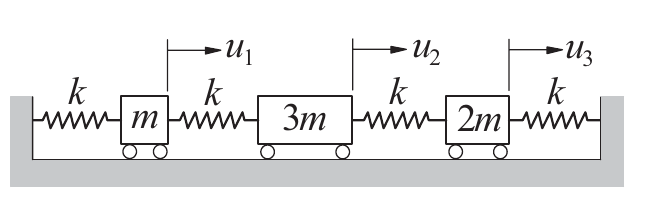
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

Frecuencias naturales (ω) en unidades de sqrt(k/m):
ω_1 = 0.502814 · sqrt(k/m)
ω_2 = 1.086702 · sqrt(k/m)
ω_3 = 1.494297 · sqrt(k/m)
Modos normales (vectores propios) - normalizados Euclídeamente (columnas):
[[-0.42955167 -0.38362421 -0.96983375]
 [-0.75050344 -0.31421871  0.22589817]
 [-0.502225    0.86838877 -0.0916107 ]]
Modos normales normalizados por masa (v^T M v = 1):
[[-0.27851068 -0.27460877 -0.92033789]
 [-0.48660787 -0.2249264   0.21436937]
 [-0.32563027  0.62161659 -0.08693531]]


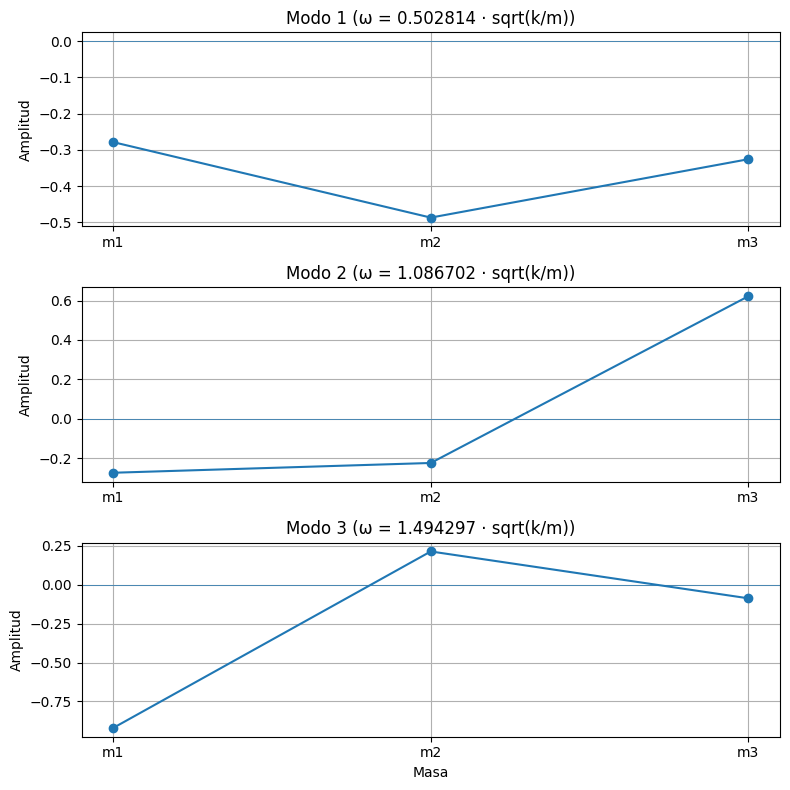

In [15]:
k = 1.0
m = 1.0

K = k * np.array([[2, -1,  0],
                  [-1, 2, -1],
                  [0, -1,  2]], dtype=float)

M = np.diag([m, 3*m, 2*m])


eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)


idx = np.argsort(np.real(eigvals))
eigvals = np.real(eigvals[idx])
eigvecs = np.real(eigvecs[:, idx])

# Frecuencias naturales (en unidades de sqrt(k/m))
omega = np.sqrt(eigvals)

# Normalizar modos (norma Euclídea = 1)
modes_norm = eigvecs / np.linalg.norm(eigvecs, axis=0)

# Normalización de modos por masa: v^T M v = 1
modes_massnorm = np.zeros_like(modes_norm)
for i in range(modes_norm.shape[1]):
    v = eigvecs[:, i]
    norm_factor = np.sqrt(v.T @ M @ v)
    modes_massnorm[:, i] = v / norm_factor


print("Frecuencias naturales (ω) en unidades de sqrt(k/m):")
for i, w in enumerate(omega, 1):
    print(f"ω_{i} = {w:.6f} · sqrt(k/m)")

print("Modos normales (vectores propios) - normalizados Euclídeamente (columnas):")
print(modes_norm)

print("Modos normales normalizados por masa (v^T M v = 1):")
print(modes_massnorm)


x_posiciones = np.array([1, 2, 3])
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(x_posiciones, modes_massnorm[:, i], marker='o')
    plt.axhline(0, linewidth=0.5)
    plt.title(f"Modo {i+1} (ω = {omega[i]:.6f} · sqrt(k/m))")
    plt.ylabel('Amplitud')
    plt.xticks(x_posiciones, ['m1','m2','m3'])
    plt.grid(True)
plt.xlabel('Masa')
plt.tight_layout()
plt.show()
